In [2]:
import numpy as np
import pylidc as pl
import matplotlib.pyplot as plt

# Scan情報

In [3]:
pid = 'LIDC-IDRI-0001' #患者情報
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

scan

Scan(id=12,patient_id=LIDC-IDRI-0001)

In [4]:
# Scanに対するAnnotation情報
print(len(scan.annotations)) # 数
print (scan.annotations) # データ

4
[Annotation(id=84,scan_id=12), Annotation(id=85,scan_id=12), Annotation(id=86,scan_id=12), Annotation(id=87,scan_id=12)]


In [5]:
scan = pl.query(pl.Scan)[1]

scan

Scan(id=2,patient_id=LIDC-IDRI-0069)

In [6]:
# nodelu(肺結節)
nodules = scan.cluster_annotations()

print (len(nodules))
print (nodules)

3
[[Annotation(id=16,scan_id=2), Annotation(id=18,scan_id=2), Annotation(id=20,scan_id=2), Annotation(id=22,scan_id=2)], [Annotation(id=15,scan_id=2)], [Annotation(id=14,scan_id=2), Annotation(id=17,scan_id=2), Annotation(id=19,scan_id=2), Annotation(id=21,scan_id=2)]]


In [7]:
# これなんだろう？？？
vol = scan.to_volume()

vol.shape

Loading dicom files ... This may take a moment.


(512, 512, 136)

Loading dicom files ... This may take a moment.


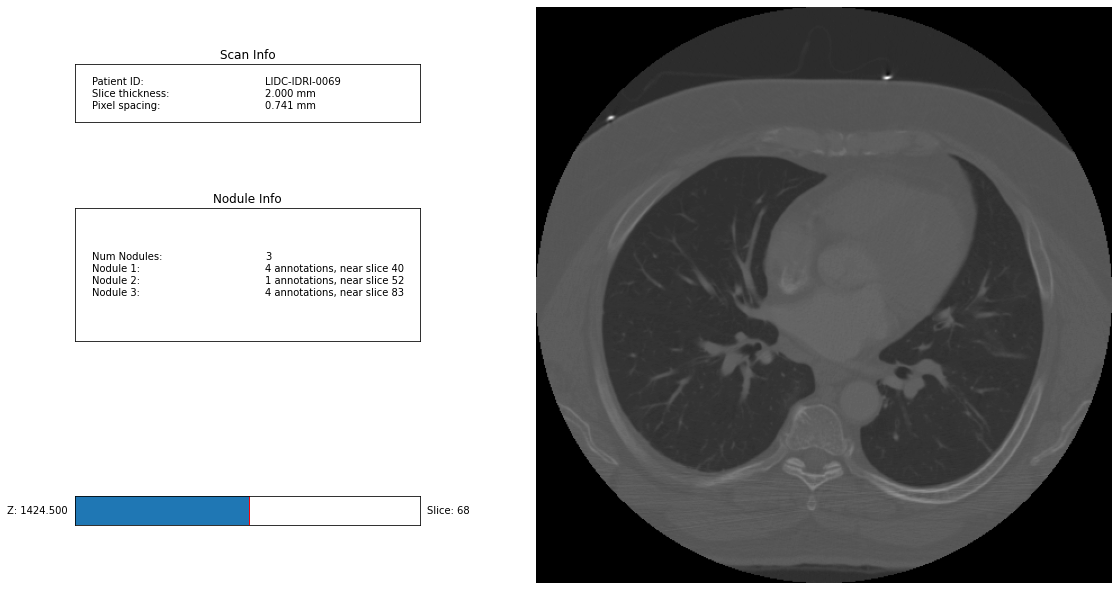

In [8]:
# とりあえず可視化

scan.visualize(annotation_groups=nodules)

# Annotation情報

In [9]:
# 特定のAnnotationデータをとってくる
ann1 = pl.query(pl.Annotation).filter(pl.Scan.patient_id == pid)[100]
ann2 = pl.query(pl.Annotation)[100]
# これ上と下って同じものがとれてるの？？？

print (ann1.scan.patient_id)
print (ann2.scan.patient_id)

LIDC-IDRI-0003
LIDC-IDRI-0003


In [10]:
# Annotationされているデータを全てとる
anns = pl.query(pl.Annotation).all()

# anns

In [20]:
# textureが1のものだけとってくるようにする
texture_1 = pl.query(pl.Annotation).filter(pl.Annotation.texture == 1)

for i in range(len(texture_1.all())):
    print (texture_1[i].scan)

Scan(id=13,patient_id=LIDC-IDRI-0002)
Scan(id=14,patient_id=LIDC-IDRI-0003)
Scan(id=17,patient_id=LIDC-IDRI-0006)
Scan(id=19,patient_id=LIDC-IDRI-0008)
Scan(id=27,patient_id=LIDC-IDRI-0016)
Scan(id=37,patient_id=LIDC-IDRI-0026)
Scan(id=53,patient_id=LIDC-IDRI-0042)
Scan(id=55,patient_id=LIDC-IDRI-0044)
Scan(id=56,patient_id=LIDC-IDRI-0045)
Scan(id=56,patient_id=LIDC-IDRI-0045)
Scan(id=57,patient_id=LIDC-IDRI-0046)
Scan(id=57,patient_id=LIDC-IDRI-0046)
Scan(id=59,patient_id=LIDC-IDRI-0048)
Scan(id=59,patient_id=LIDC-IDRI-0048)
Scan(id=59,patient_id=LIDC-IDRI-0048)
Scan(id=59,patient_id=LIDC-IDRI-0048)
Scan(id=60,patient_id=LIDC-IDRI-0049)
Scan(id=60,patient_id=LIDC-IDRI-0049)
Scan(id=60,patient_id=LIDC-IDRI-0049)
Scan(id=66,patient_id=LIDC-IDRI-0055)
Scan(id=66,patient_id=LIDC-IDRI-0055)
Scan(id=66,patient_id=LIDC-IDRI-0055)
Scan(id=66,patient_id=LIDC-IDRI-0055)
Scan(id=66,patient_id=LIDC-IDRI-0055)
Scan(id=69,patient_id=LIDC-IDRI-0058)
Scan(id=69,patient_id=LIDC-IDRI-0058)
Scan(id=85,p

In [12]:
# textureの情報をとってくる
ann1.texture

5

In [13]:
print (pl.query(pl.Annotation).first())
print ('===============================')
print (pl.query(pl.Annotation).filter(pl.Annotation.texture == 1).first())
print ('===============================')
print (pl.query(pl.Scan).filter(pl.Annotation.texture == 5).first())
print (pl.query(pl.Scan).filter(pl.Annotation.spiculation == 1).first())
print ('===============================')
print (pl.query(pl.Scan.patient_id == pid)) # この呼び出し方はできないみたい

Annotation(id=1,scan_id=1)
Annotation(id=88,scan_id=13)
Scan(id=1,patient_id=LIDC-IDRI-0078)
Scan(id=1,patient_id=LIDC-IDRI-0078)
SELECT scans.patient_id = ? AS anon_1 
FROM scans


In [14]:
# for t in list(texture_1):
#     print (t.print_formatted_feature_table())
#     print ('================================')